# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [ ]:
# You can uncomment the below code and run the Notebook if it is used in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python Course/Week Five/Project2/ExtraaLearn.csv")

In [ ]:
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:

- There are 4612 observations and 15 columns in the dataset.
- All the columns have 4612 non-null values, i.e., there are no missing values in the data.
- Majority are catogorical values. Age, time_spent_on_website, page_views_per_vist, website_visits are numerical
- Eventhough status is int, we do have to consider it as categorical as this is our target variable

**Let's check the unique values in each column**

In [ ]:
# Checking unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**

- **ID is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.

- As seen before Age, website_visits, time_spent_on_website, and page_views_per_visit are continous/numerical columns. All the others can be categorical columns


**Drop the ID** and define lists for numerical and categorical columns to explore them separately.

In [ ]:
# Dropping the columns
df=df.drop(['ID'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [ ]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Creating categorical variables
cat_cols= ['current_occupation', 'first_interaction','profile_completed', 'last_activity','print_media_type1',
           'print_media_type2', 'digital_media','educational_channels', 'referral', 'status']

**Understanding the numerical coloumns**

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations:**
- The average age of the Leads is 46. Median > Mean showing the data is skewed to the left. This shows we have extreme min values.
- Average number of website visitis is 3.5 which little greater than the Median, The distribution is skewed to the right because their are outliers as the 75% quartile value is 5 but the max is 30
- 50% of th leads spend about 376sec, but we see some hier values in the right with MAX of 2537sec which means the distribution is skewed to the right
- On an average 3 pages are viewed per visit, but we see outliers in the right with Max of 18pages while the 75% is 3.7. This indicates outliers. the distribution is agin skewed to the right

**Undertanding the percentages of the catogorical variables**

In [ ]:
# Printing number of count of each unique value in each column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

**Observations:**
- The Lead conversion rate is 30%. which is very imbalanced
- Over 50% of the Leads are working professionals, which is majority of the leads. It maybe the courses are more inline with working professionals, or maybe they are easier to reach
- Over 55% of the first interactions are happening through the website, this shows majority of the leads first interect through the website
- 49% of th Leads complete thier profile 48% leads have medium profile completion
- %50 of the last activity happens through Email.
- Out of all the type of media, educational_channels seems to get more leads with 15%, followed by digital media(11%) and print_media_type1(10%). refferals are just at 2%


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Exploring numerical and catogorical variables in some more depth by observing their distributions**

Distribution of Numerical variables

In [ ]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

**Age of the Leads**

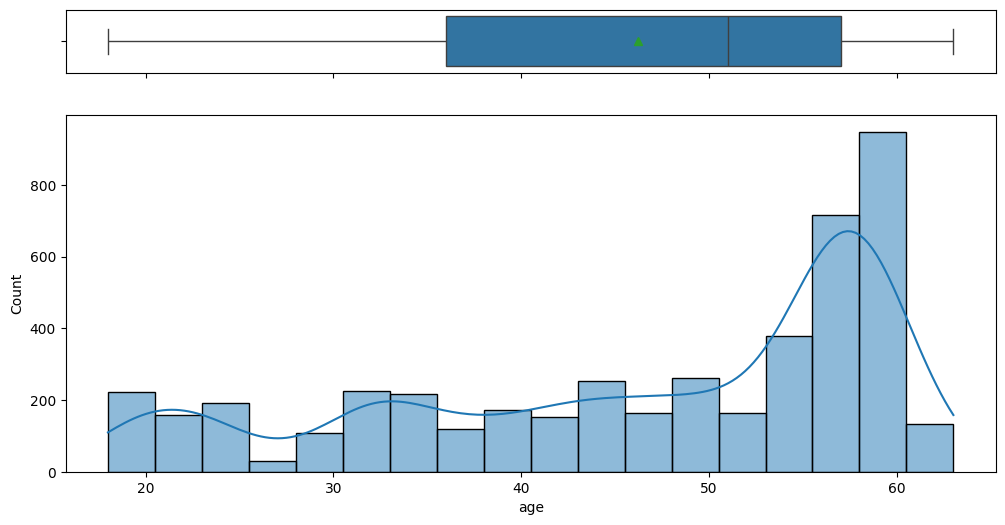

In [ ]:
hist_box(df, "age")

**Observations:**
- Skewed to the left, that is majority of the leads fall to the rightside between 50 and 60 years of age
- No outliers here

**Number of website visits**

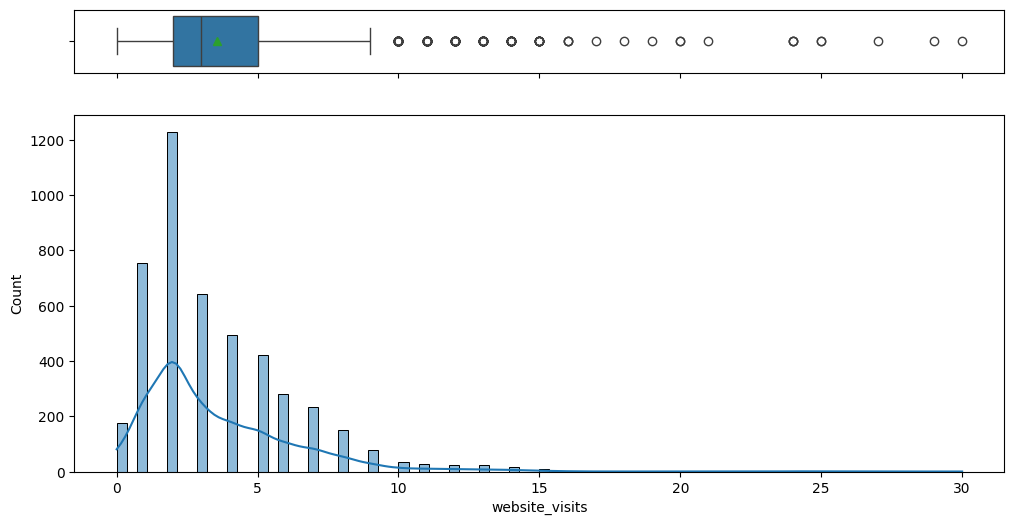

In [ ]:
hist_box(df, "website_visits")

In [ ]:
#df[df['website_visits']>15]
df.website_visits.value_counts(normalize=True)

website_visits
2     0.266479
1     0.163703
3     0.138985
4     0.107112
5     0.091500
6     0.061145
7     0.050304
0     0.037728
8     0.032741
9     0.016912
10    0.007372
11    0.006288
12    0.005421
13    0.004987
14    0.003686
15    0.001951
24    0.000650
16    0.000650
25    0.000434
20    0.000434
30    0.000217
18    0.000217
27    0.000217
21    0.000217
17    0.000217
19    0.000217
29    0.000217
Name: proportion, dtype: float64

In [ ]:
df[df['website_visits']>15].shape

(17, 14)

**Observations:**
- We can see that most of the leads i.e. 55% visit the website 1-3 times, with 26% of them visiting 2 times
- Almost 3% has 0 number of pages visited. These could be leads who cantacted the company directly through email
- As the number of visits increase the percentage of leads is decreasing, which is less percentage of leads who visiting
- The percentage of categories 16 or above is very less. We can consider these values as outliers.
- We can see that there are just 17 observations with a number of visits 15 or greater, in that we have 4 that have status 1

**Time spent of the website in seconds**

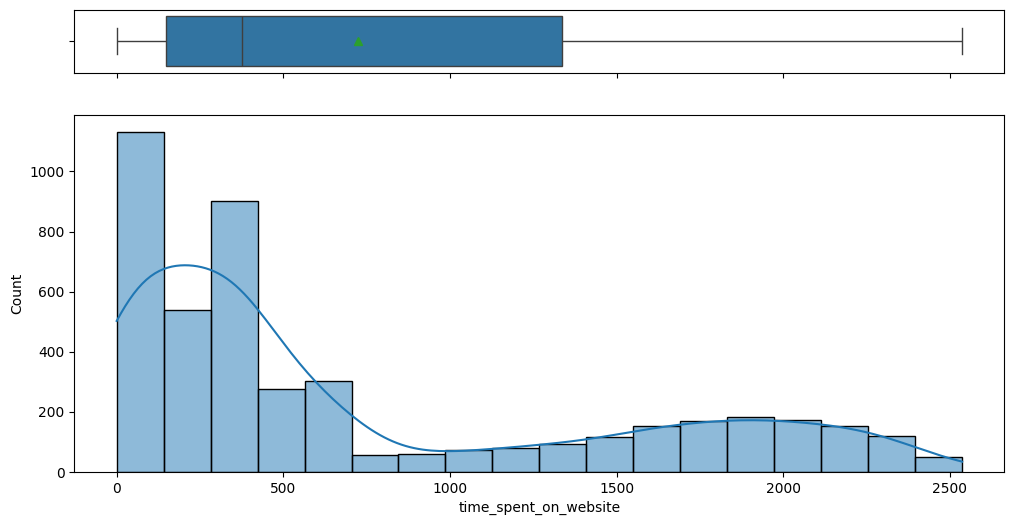

In [ ]:
hist_box(df, "time_spent_on_website")

**Observations:**
- The distribution is skewed to the right with majority of the leads spending between 0 to 500 seconds


**Pages viewed per visit**

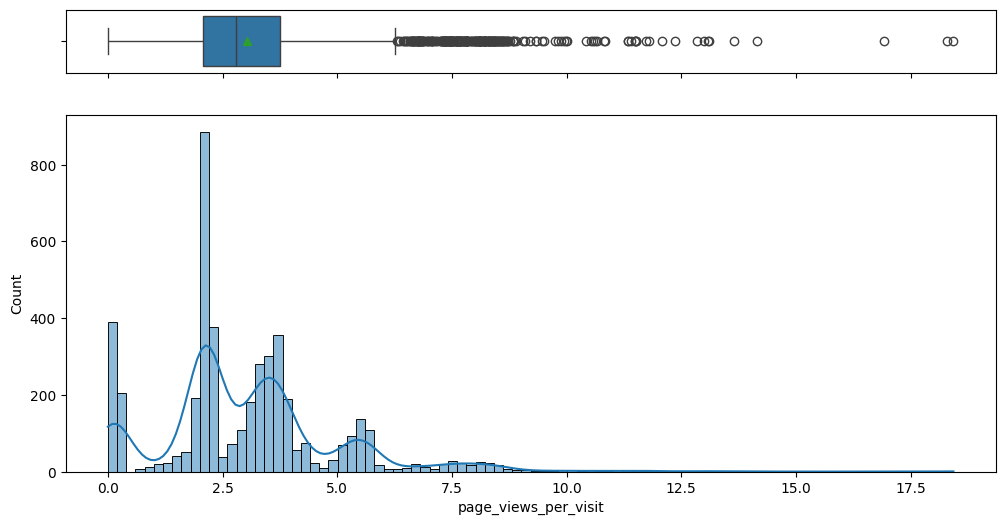

In [ ]:
hist_box(df, "page_views_per_visit")

In [ ]:
df.page_views_per_visit.value_counts(normalize=True)

page_views_per_visit
0.000    0.039245
2.168    0.003036
2.154    0.002819
2.200    0.002602
2.170    0.002385
           ...   
5.793    0.000217
4.944    0.000217
5.624    0.000217
1.413    0.000217
2.692    0.000217
Name: proportion, Length: 2414, dtype: float64

In [ ]:
df[df['page_views_per_visit']>10].shape

(27, 14)

**Observations:**
- The distribution can be called skewed to the right with so many datapoints that are outliers.
- Almost 3% has 0 number of pages visited, which is consistent with website_visits and here this is the majority. It means that these could be leads who cantacted the company directly through email
- The distribution of the data makes it harder to put a lower threshold for the outliers.
- Considering this it's better to take a threshold like 10 to be considered as outliers


Treating outliers

In [ ]:
# Updating the website_visits values for the outliers to the median of the website_value coloumn
df.loc[df['website_visits'] > 15, 'website_visits'] = 3.000

# Updating the pages_per_visit values for the outliers to the median of the pages_per_visit
df.loc[df['page_views_per_visit'] > 10, 'page_views_per_visit'] = 2.792



### **Univariate analysis for categorical variables**

**Current Occupation of the leads**

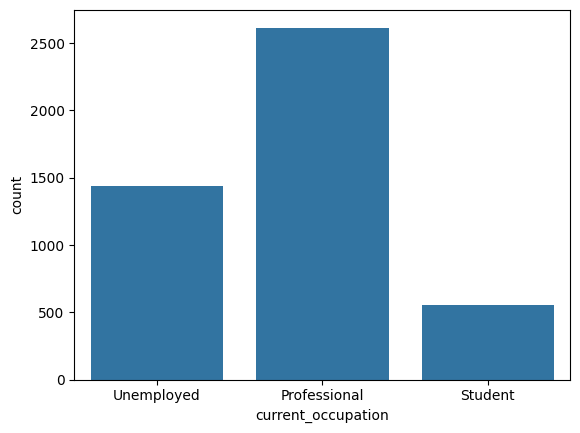

In [ ]:
sns.countplot(x = df['current_occupation'])
plt.show()

In [ ]:
df['current_occupation'].value_counts(normalize=True)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64

**Observations:**
- Over 50% of the Leads are working professionals, which is majority of the e leads.
- 31% of the leads are unemployed and 12% are students

**First Interaction of the lead with the company**

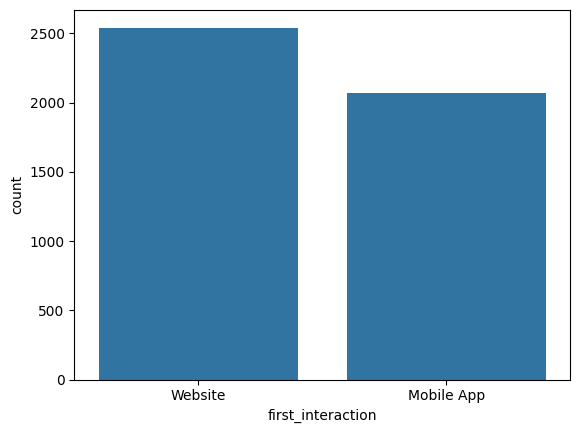

In [ ]:
sns.countplot(x = df['first_interaction'])
plt.show()

In [ ]:
df['first_interaction'].value_counts(normalize=True)

first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64

**Observations**
- About 55%, more than half of the leads first interated with the company through a website,

**Percentage of online Profile completion of the lead**

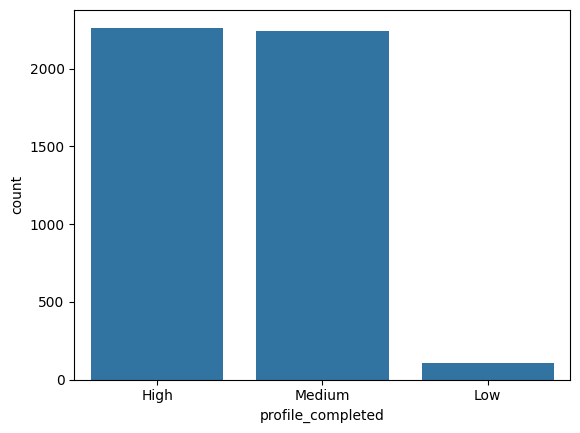

In [ ]:
sns.countplot(x = df['profile_completed'])
plt.show()

In [ ]:
df['profile_completed'].value_counts(normalize=True)

profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64

**Observations**
- 49% of th Leads complete thier profile 48% leads have medium profile completion, together its 50-100% profile completion
- A very low percentage of the leads have 0-50% of their profile completed

**Last interaction between the lead and the company**

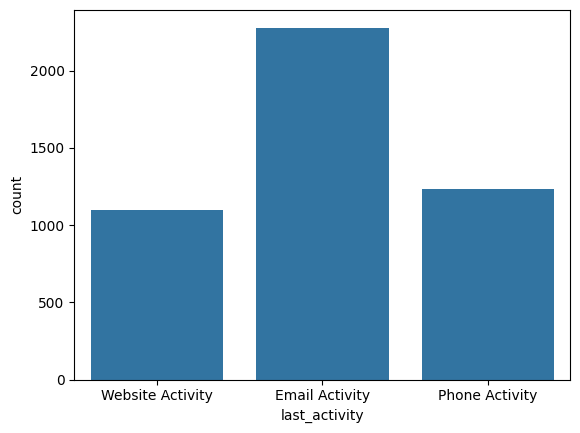

In [ ]:
sns.countplot(x = df['last_activity'])
plt.show()

In [ ]:
df['last_activity'].value_counts(normalize=True)

last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64

**Observations**
- %50 of the last activity happens through Email, which means majority of the leads seek details about the program through Email
- 26% of the leads get the info over phone and 23% on the website


**Univariate analysis of all the media fields.**
Newspaper(print_media_type1),Magazine(print_media_type2), digital_media,educational_channels and referral

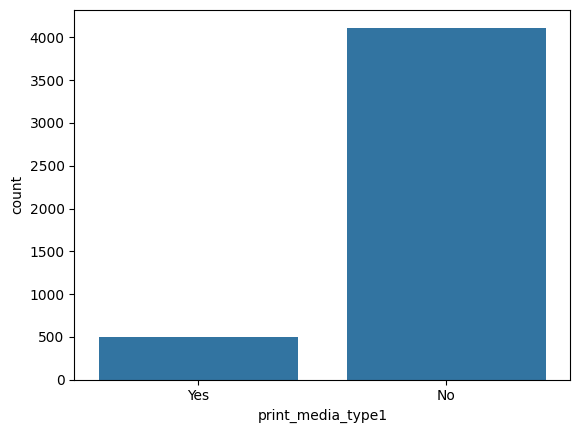

print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************


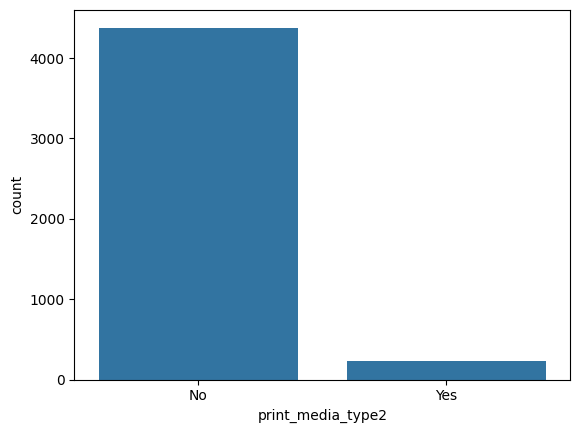

print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************


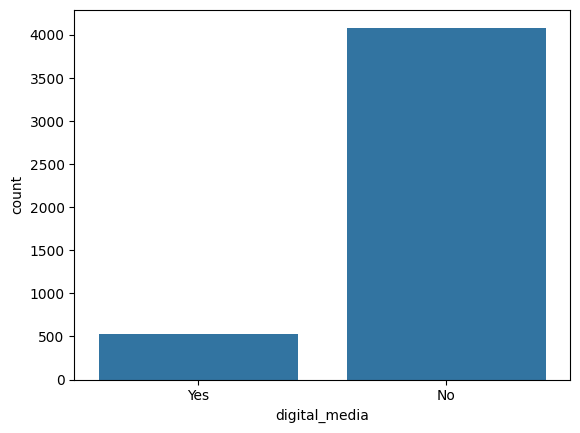

digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************


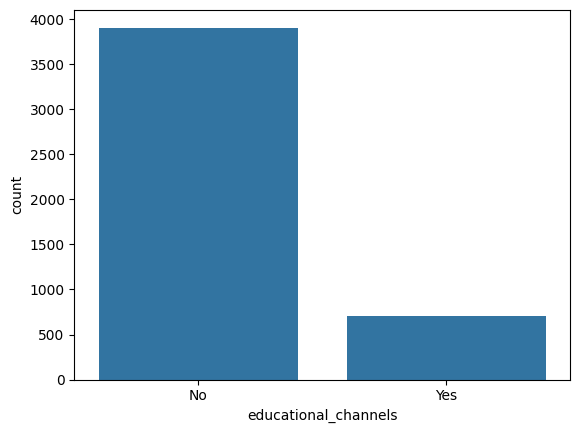

educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64
****************************************


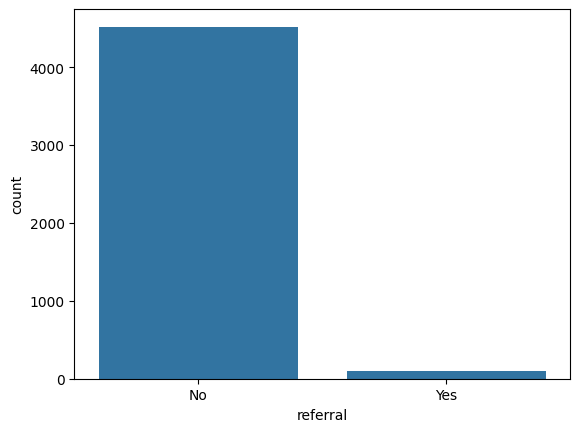

referral
No     0.979835
Yes    0.020165
Name: proportion, dtype: float64
****************************************


In [ ]:
bicat_col = ['print_media_type1','print_media_type2', 'digital_media','educational_channels', 'referral']
for j in bicat_col:
    sns.countplot(x = df[j])
    plt.show()
    print(df[j].value_counts(normalize=True))
    print('*'*40)
    df[num_cols]

**Observations**
- 10% of the leads had seen add in Newspaper 5% of them seen in the Magazine
- 11% of the leads saw the add through digital media platforms and 15% through educational channels and 2% heard through referral
- Majority of the leads heard through educational channels

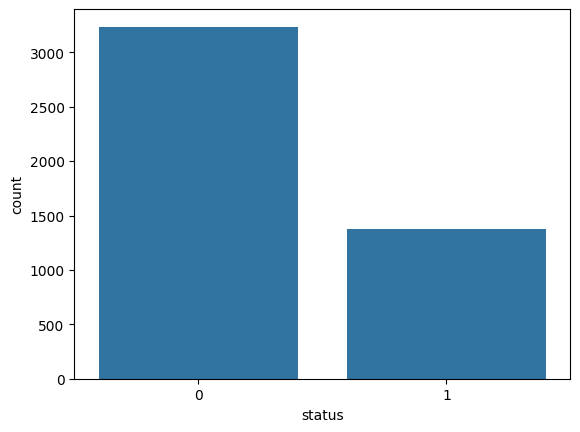

In [ ]:
sns.countplot(x = df['status'])
plt.show()

In [ ]:
df['status'].value_counts(normalize=True)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

**Observations**
- The Lead conversion rate is 30%
- This shows an imbalance distribution among the classes for our target variable

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. **The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**
3. **The company uses multiple modes to interact with prospects. Which way of interaction works best?**
4. **The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**
5. **People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**


### **Let's check the relationship between different numerical variables**

<Axes: >

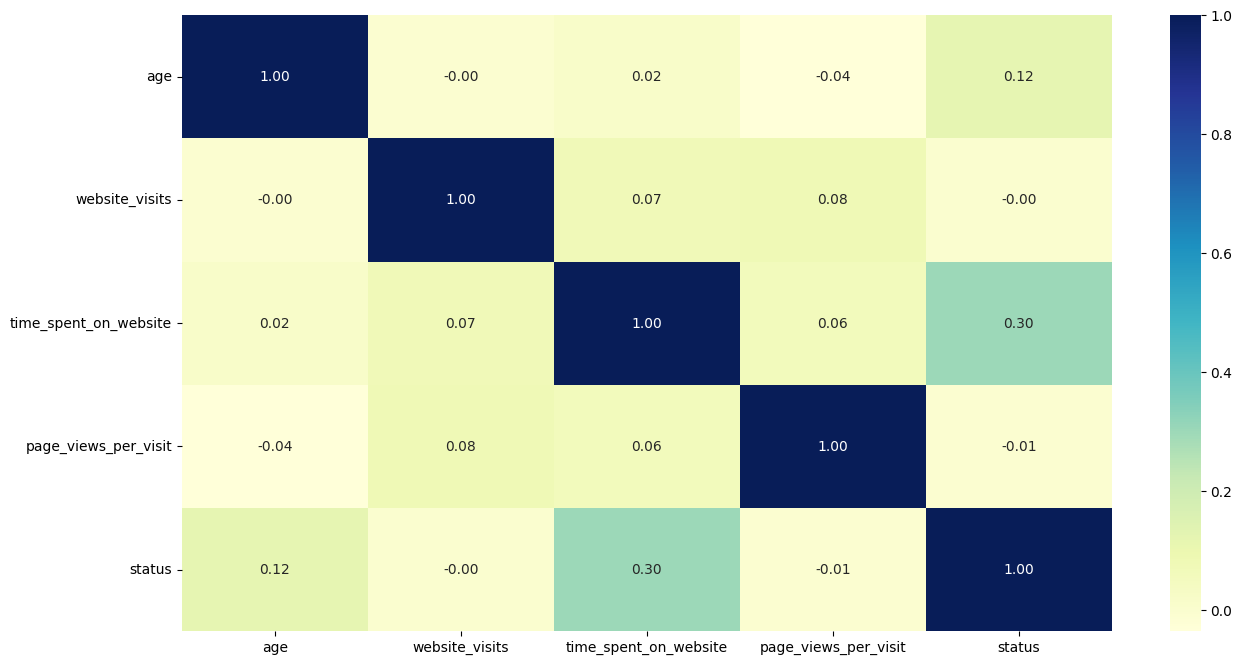

In [ ]:
# Plotting the correlation between numerical variables
col_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,8))
sns.heatmap(df[col_list].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

- Our target variable status is highely correlated with time_spent_on_website
-status is also positively correlated to Age
- time_spent_on_website is poorly but positively correlated with website_visits and page_views_per_visit, which make sense as when a person visits a website it adds up to the time spent and also the pages viewed
- Age is negetively correlated with website_visits and page_views_per_visit
- Age and time spent on the website are poorly but possitively correlated


**Understand the realtion between target variable Status categorical variables**

In [ ]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="upper right")
  plt.ylabel(target)

**Questions#1 Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

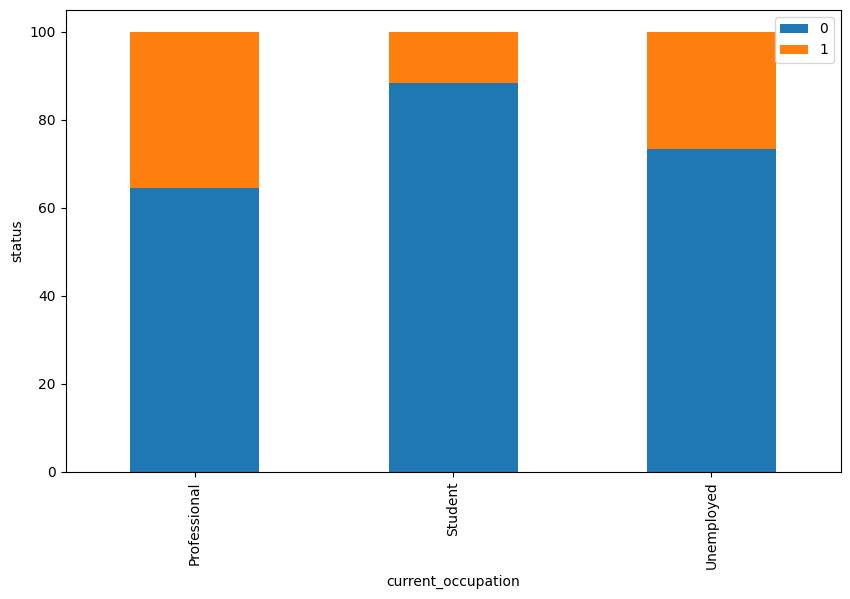

In [ ]:
stacked_barplot(data, "current_occupation", "status" )

**Observations:**
- Professionals tend to have higer conversion rate, followed by unemployed and then studets

**Questions#2 The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?**

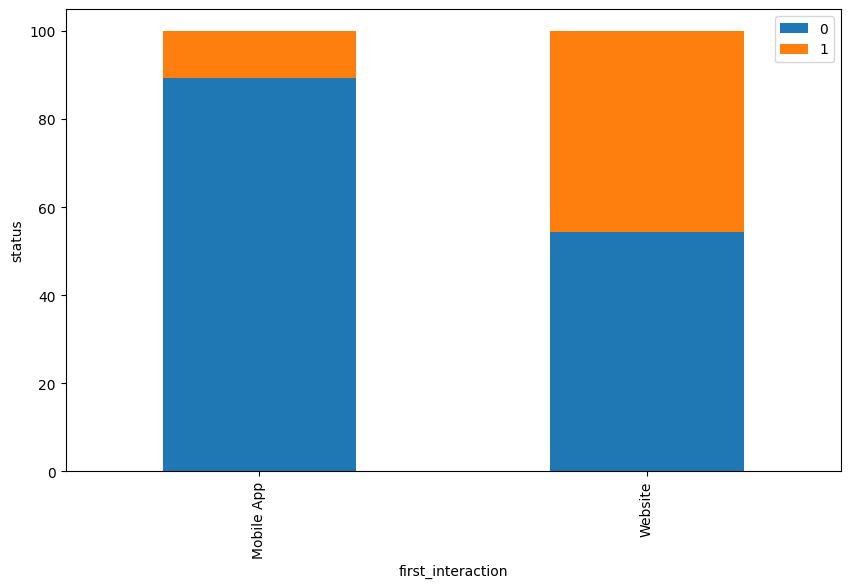

In [ ]:
stacked_barplot(data, "first_interaction", "status" )

**Observations**
- Leads who contacted the company through the website for the first time have higer conversion to paid customers compared to leads who contacted through Mobile App
- This means the company website has higher impact on the lead conversion compared to the mobile app

**Question#5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?**

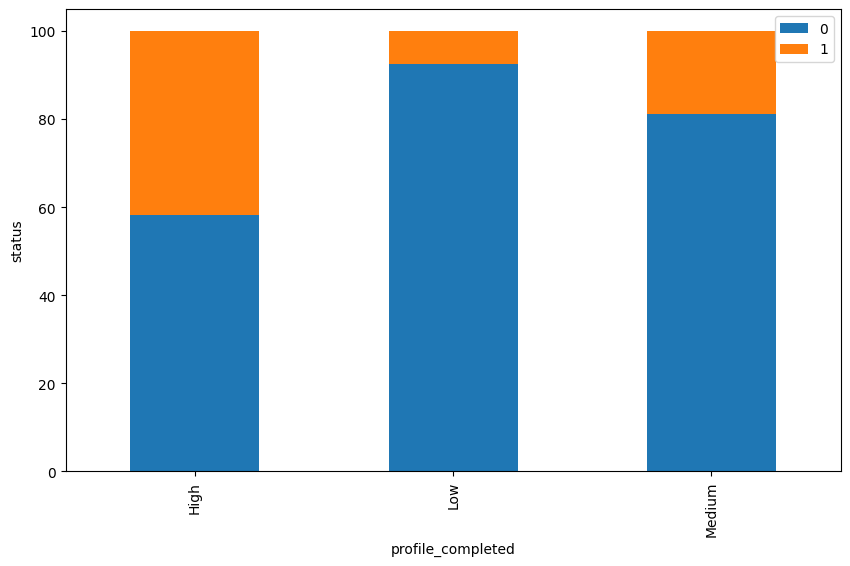

In [ ]:
stacked_barplot(data, "profile_completed", "status" )

**Observation**
- Leads who have had higer percentage of profile completion have higher conversion rate compared to Medium and low
- From our previous observation number/percentage of data points with High and Medium profile completion are almost same, but the conversion is higher for High profile completion

**Question#3 The company uses multiple modes to interact with prospects. Which way of interaction works best?**

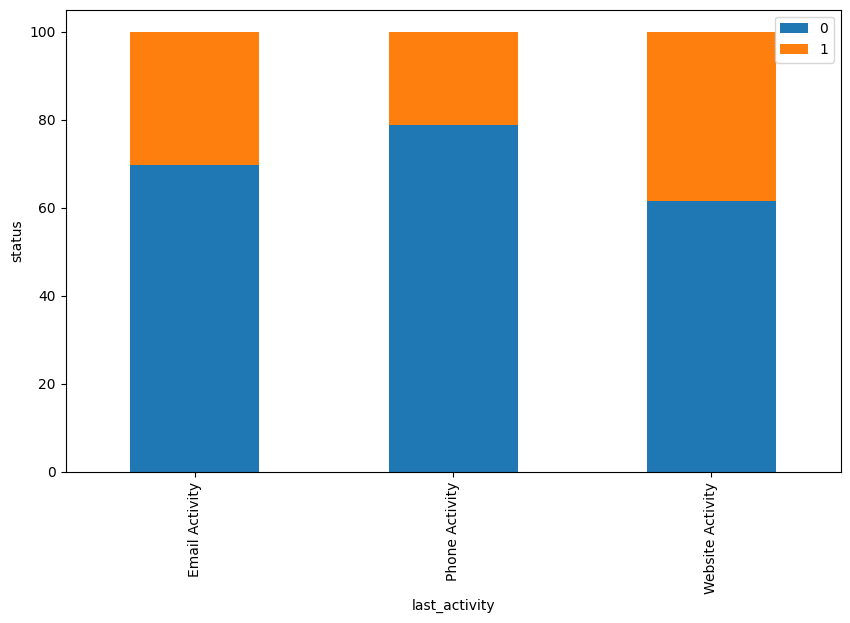

In [ ]:
stacked_barplot(data, "last_activity", "status" )

**Observations**
- Leads who had the last interacted on live chat with a representative on the website have higer conversion rate compared other modes
- Email activity takes the second place while phone activity has a low conversion rate

**Question#4 The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?**

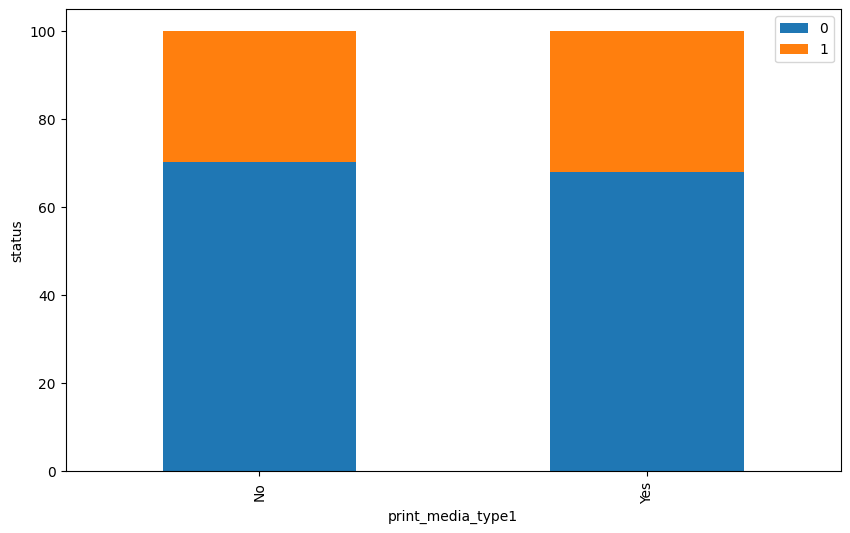

In [ ]:
stacked_barplot(data, "print_media_type1", "status" )

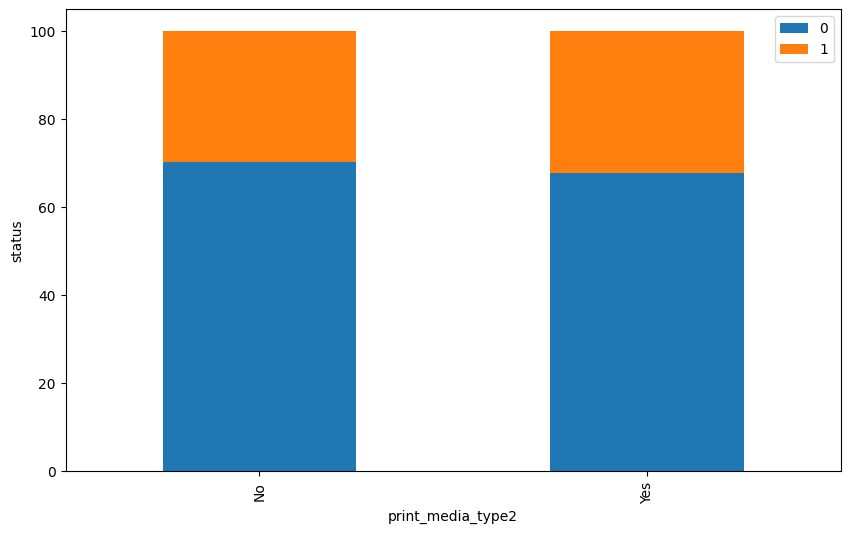

In [ ]:
stacked_barplot(data, "print_media_type2", "status" )

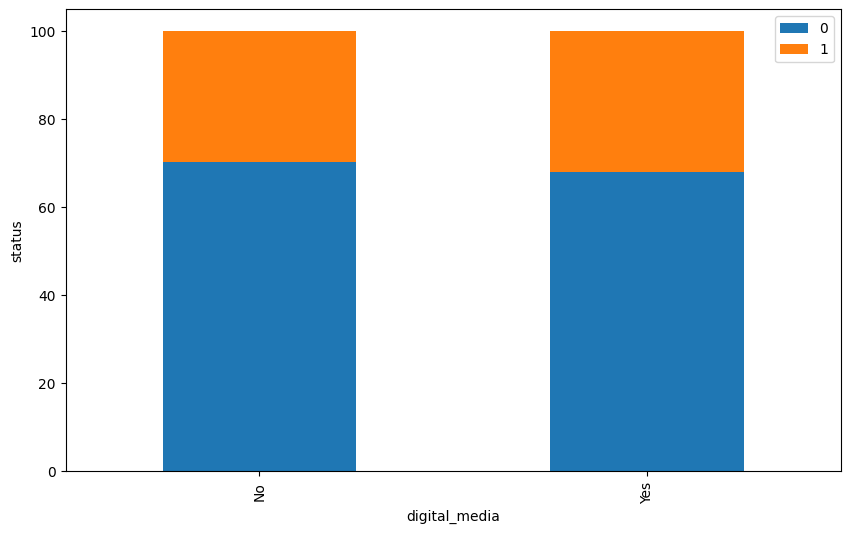

In [ ]:
stacked_barplot(data, "digital_media", "status" )

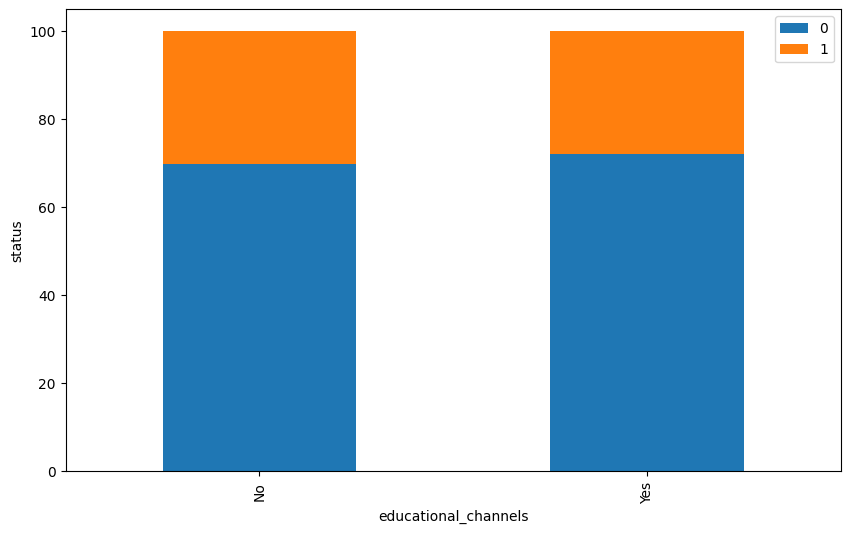

In [ ]:
stacked_barplot(data, "educational_channels", "status" )

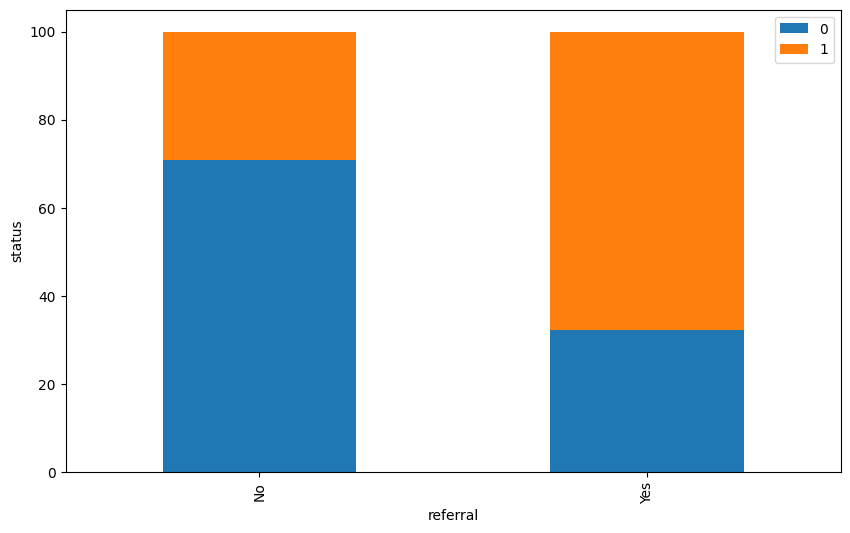

In [ ]:
stacked_barplot(data, "referral", "status" )

**Answer: Out of all the types of media including referral, referrals tend to have highest conversion rate**

**Let's check the relationship between status and Numerical variables**

In [ ]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.501700,577.420711,2.976667
1,48.663762,3.487291,1068.397967,2.953032


**Observations**
 - Leads who are converted to paid customers spend an average of 1068 seconds on the website, compared to non converted leads who spend on average 577 seconds on the website
 - The average age of a converted paid customer is 48.6
 - The average number of website visits and page views of converted paid customers is lower than the not converted leads. This could again be again leads converted by the company over phone or email with little use of the website


**Observations:**

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Observations:**

## Data preperation for Modeling

**Creating dummy variables for categorical Variables**

In [ ]:
# Creating list of dummy columns
get_dummies_for_cols = ['current_occupation', 'first_interaction','profile_completed', 'last_activity']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = get_dummies_for_cols , drop_first = True)

# Mapping overtime and attrition
dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No':0}
dict_educational_channels = {'Yes': 1, 'No':0}
dict_referral = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_print_media_type1)
df['print_media_type2'] = df.print_media_type2.map(dict_print_media_type2)
df['digital_media'] = df.digital_media.map(dict_digital_media)
df['educational_channels'] = df.educational_channels.map(dict_educational_channels)
df['referral'] = df.referral.map(dict_referral)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   print_media_type1               4612 non-null   int64  
 5   print_media_type2               4612 non-null   int64  
 6   digital_media                   4612 non-null   int64  
 7   educational_channels            4612 non-null   int64  
 8   referral                        4612 non-null   int64  
 9   status                          4612 non-null   int64  
 10  current_occupation_Student      4612 non-null   bool   
 11  current_occupation_Unemployed   4612 non-null   bool   
 12  first_interaction_Website       46

Separating the independent variables (X) and the dependent variable (Y)

In [ ]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,330,0.074,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,464,2.057,0,0,0,0,0,1,False,True,True,False,False,False,True
4,23,4,600,2.792,0,0,0,0,0,0,True,False,True,False,False,False,False


In [ ]:
# Separating target variable and other variables
X=df.drop(columns='status')
Y=df['status']

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,False,False,False,False,True,False,True
2,52,3,330,0.074,0,0,1,0,0,False,False,True,False,True,False,True
3,53,4,464,2.057,0,0,0,0,0,False,True,True,False,False,False,True
4,23,4,600,2.792,0,0,0,0,0,True,False,True,False,False,False,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   print_media_type1               4612 non-null   int64  
 5   print_media_type2               4612 non-null   int64  
 6   digital_media                   4612 non-null   int64  
 7   educational_channels            4612 non-null   int64  
 8   referral                        4612 non-null   int64  
 9   current_occupation_Student      4612 non-null   bool   
 10  current_occupation_Unemployed   4612 non-null   bool   
 11  first_interaction_Website       4612 non-null   bool   
 12  profile_completed_Low           46

In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4612 entries, 0 to 4611
Series name: status
Non-Null Count  Dtype
--------------  -----
4612 non-null   int64
dtypes: int64(1)
memory usage: 36.2 KB


Splitting the data into a 70% train and 30% test set

In [ ]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will be converted to a paid customer when the Lead doesn't convert
2. Predicting a lead will not be converted to a paid customer when actually the lead converts

**Which case is more important?**

* **Predicting a lead will not be converted to a paid customer when actually the lead converts**, i.e., losing out on a lead means losing on a potential source of income for the company as the lead will not be allocated proper resources by the company when he/she should be targeted.
This would be considered a major miss for any lead conversion predictor and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives)

## Building a Decision Tree model

**Create a function to calculate and print the classification report and confusion matrix.**

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.**


In [ ]:
# Building decision tree model
#dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



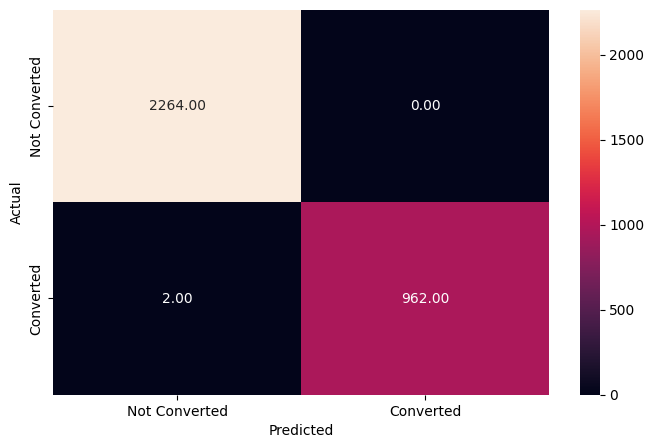

In [ ]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Write your Answer here :**

* Only 2 errors on the training set, ie; the model incorrectly predicted the lead will not convert, but the lead did convert 2 False negetives
* almost every sample has been classified correctly.
* Model has performed very well on the training set with accuracy and recall equal to 1 on class 1
* Let's check the performance on test data to see if the model is overfitting.

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       971
           1       0.66      0.66      0.66       413

    accuracy                           0.79      1384
   macro avg       0.75      0.76      0.76      1384
weighted avg       0.80      0.79      0.79      1384



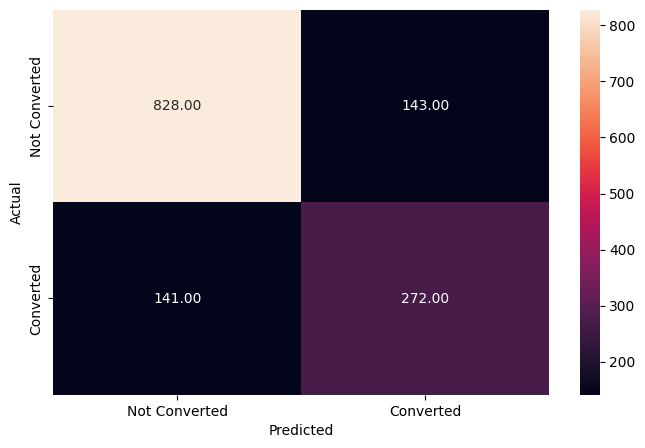

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Write your Answer here :**
* The model incorrectly predicted the lead will not convert 141(FN) times
* As a result the Accuracy fell down to 0.79 and recall came down to 0.65
* The decision tree model with the default parameters is clearly overfitting the training data and is not able to generalize well.
* We will have to tune the decision tree to reduce the overfitting.

## Do we need to prune the tree?
Yes, we need pruning. We perform Gridsearch which is a pre-pruning technique

 **Perform hyperparameter tuning for the decision tree model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=30,
                       random_state=1)

 **Check the performance of the model on the train and test data using the tuned model**

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2264
           1       0.82      0.82      0.82       964

    accuracy                           0.89      3228
   macro avg       0.87      0.87      0.87      3228
weighted avg       0.89      0.89      0.89      3228



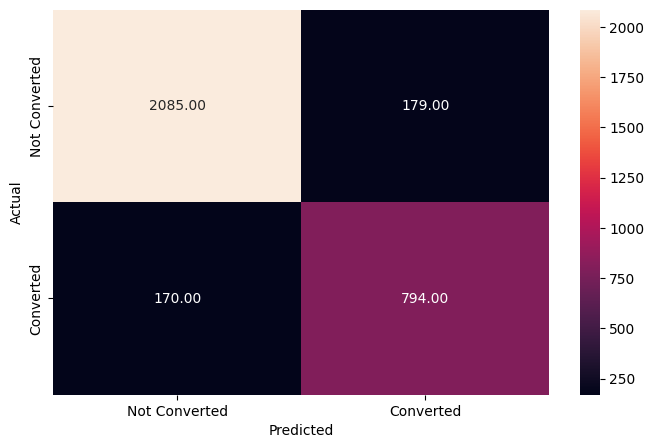

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       971
           1       0.75      0.74      0.74       413

    accuracy                           0.85      1384
   macro avg       0.82      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



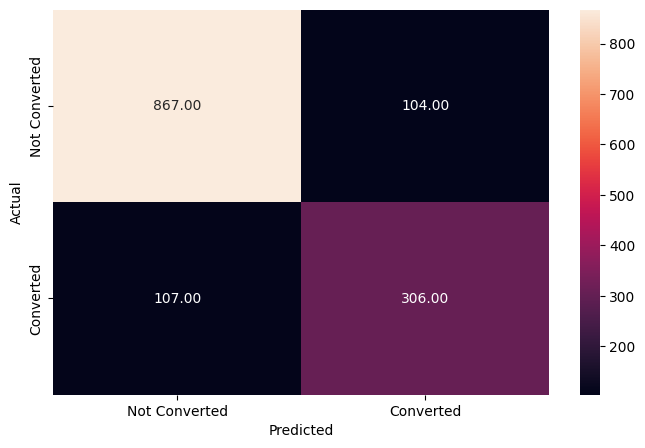

In [ ]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations :**

* Accuracy is at 0.88 on train and 0.85 on test and the recall 0.82 on train and 0.74 on test
* This is a good performace improvement as the recall on the test data has inreased significantly from 0.65 to 0.74
* As we can see tuning has generalised the performance with somewhat balanced precision and recall values.
- However, there is still some overfitting, but the model performance on test data has improved.

#### **Visualizing the Decision Tree**

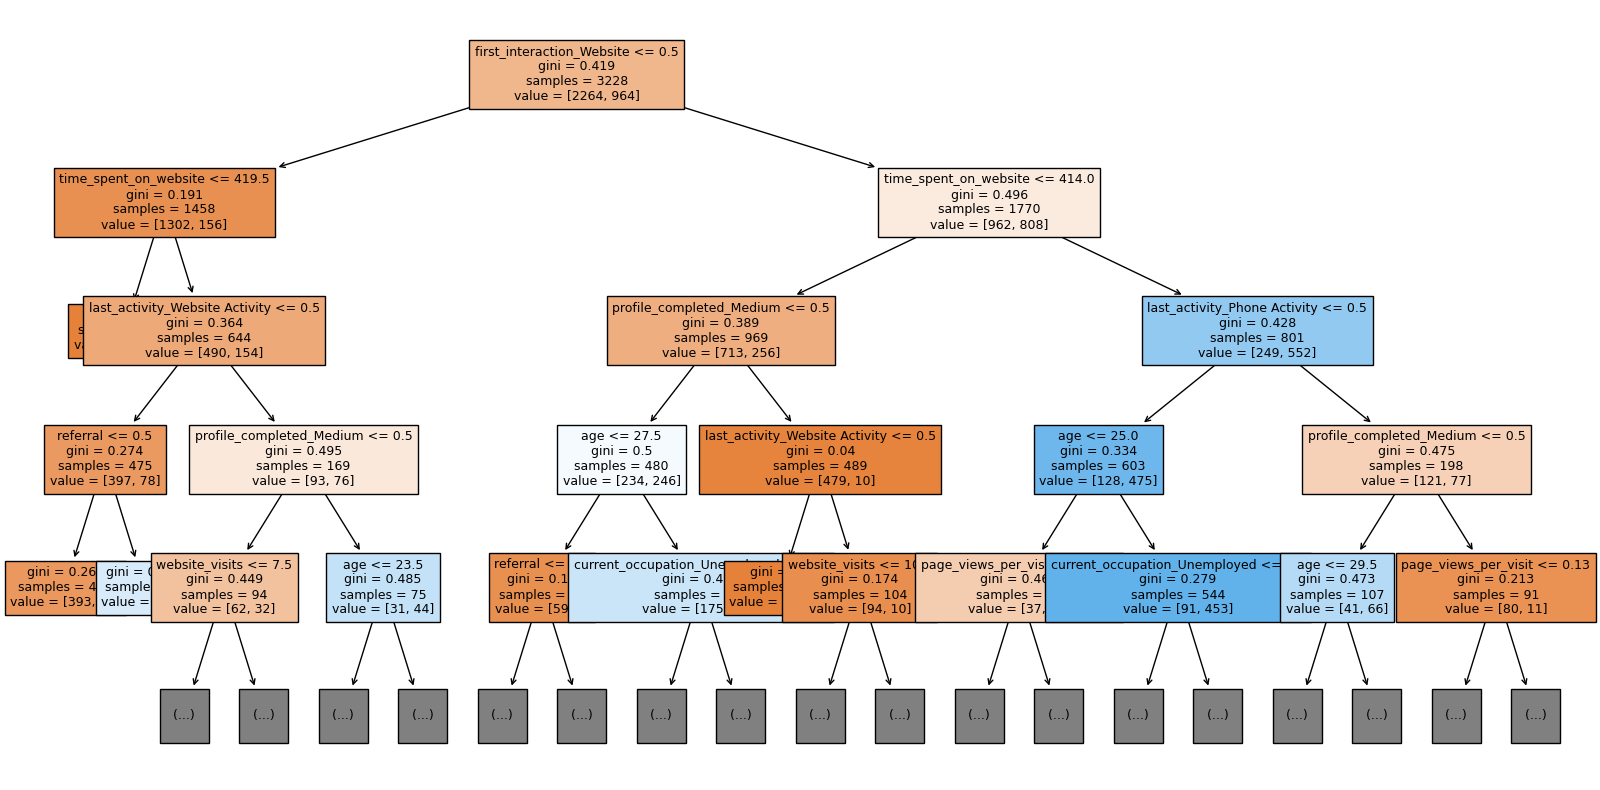

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

# Some of the important features based on the tuned decision tree

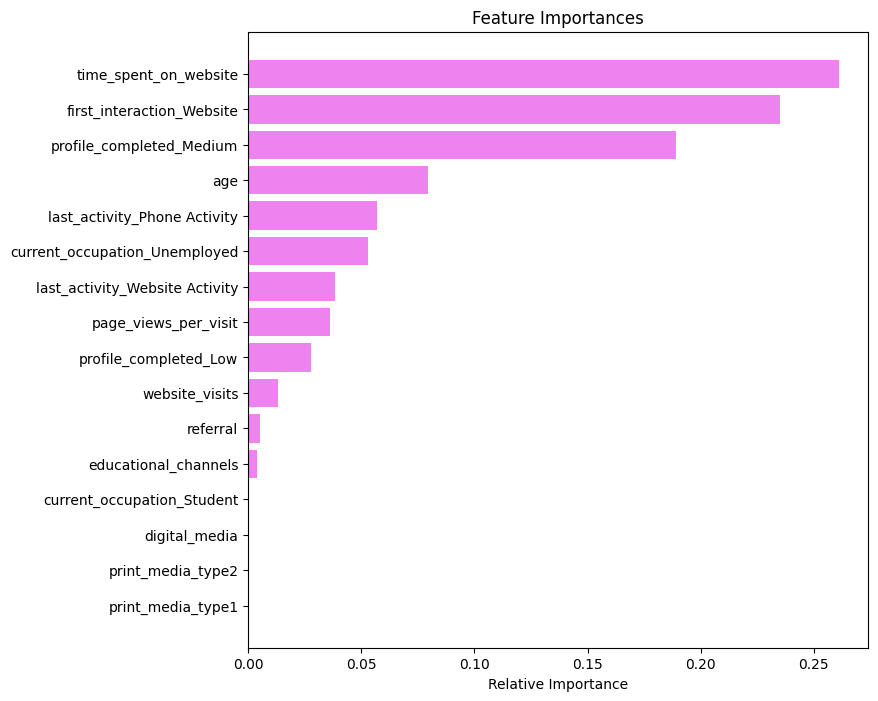

In [ ]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations :**
According to the decision tree after tuning the following are the important features
- Time Spent on website: This is inline with what we have seen from our analysis, with Heat map and relation between status and Time spent. And here the model has given higest importance.
- First interaction: As we have seen before first interaction had high conversion rate as well, which we see here is a good predictor according to the model
- Profile completed_medium (This could be after getting k-1 dummies for k categories): Again, this is inline with our observations before, that profiles which has higest completion percentage tend to have good conversion rate
- Other important features are age, last_Activity_phone and current_occupation_unemployed

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

 **Check the performance of the model on the train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



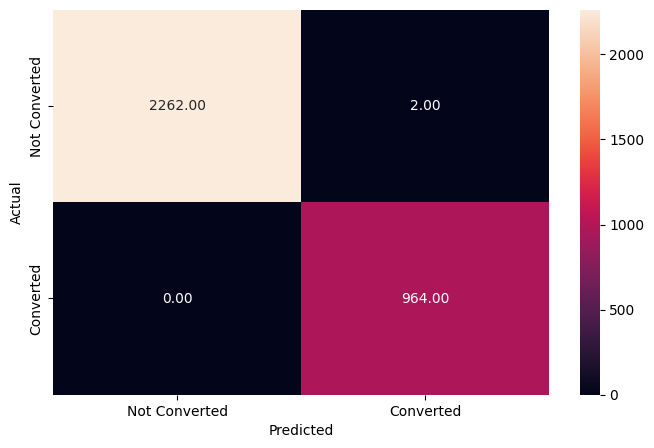

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Write your Answer here :**

- Almost 0 errors on the training set, each sample has been classified correctly with acuuracy and recall 1
- Model has performed very well on the training set.
- Let's check on the test data

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



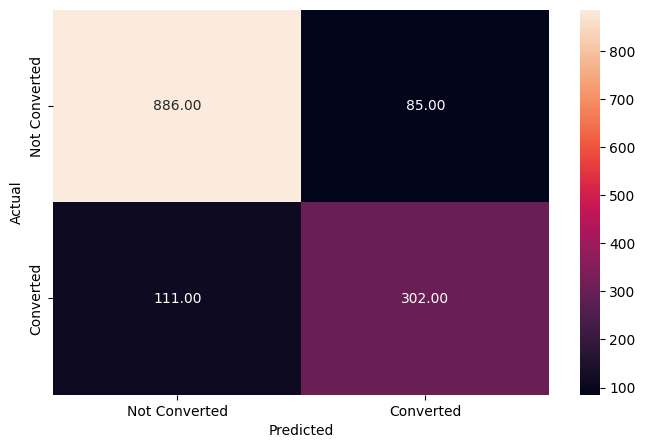

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)


* The Random Forest classifier **seems to be overfitting** on the test data
- The recall score dropped to 0.73 and accuracy to 0.86
- We can reduce overfitting and improve recall by hyperparameter tuning.

## Do we need to prune the tree?
Yes, we need pruning. We perform Gridsearch which is a pre-pruning technique\

 **Perform hyperparameter tuning for the random forest model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=250, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2264
           1       0.89      0.84      0.86       964

    accuracy                           0.92      3228
   macro avg       0.91      0.90      0.90      3228
weighted avg       0.92      0.92      0.92      3228



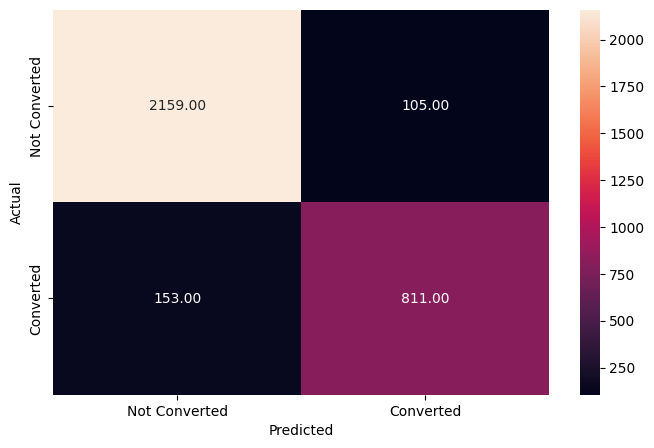

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.74      0.77       413

    accuracy                           0.87      1384
   macro avg       0.85      0.83      0.84      1384
weighted avg       0.86      0.87      0.86      1384



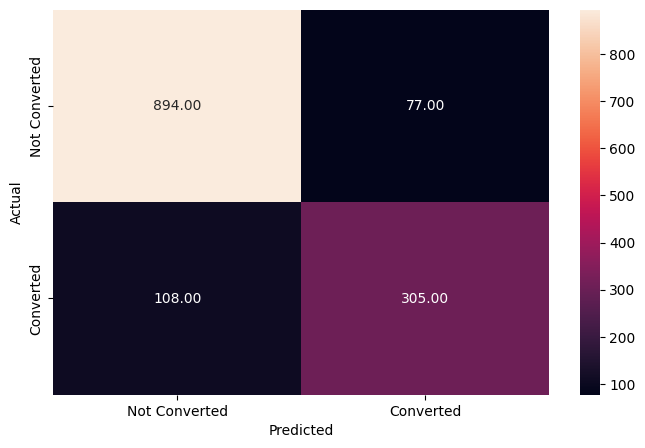

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_test)
metrics_score(y_test,dt_tuned)

**Observations**

* Accuracy is at 0.92 on train and 0.87 on test and the recall 0.84 on train and 0.74 on test
* Although the recall on the test data is somewhat similar before and after tuning around 0.74 the model is not overfitting like before tuning
* As we can see tuning has generalised the performance with somewhat balanced precision and recall values.
- However, there is still some overfitting, but the model performance on test data has improved.

**What are some important features based on the Random Forest?**

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

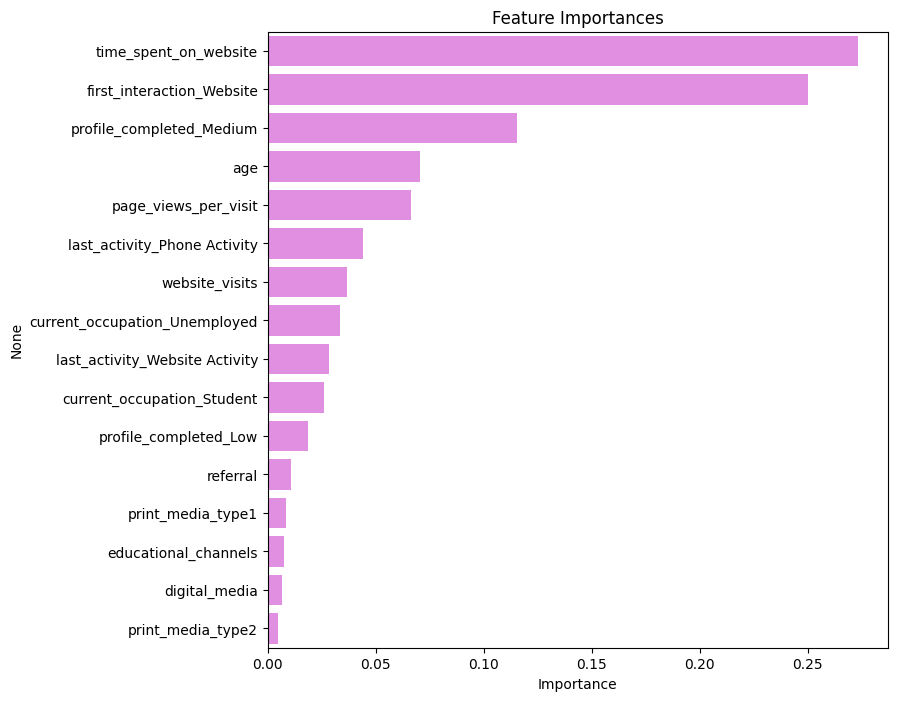

In [ ]:
importances = estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

**Observations :**
According to the Random forest model after tuning the following are the important features
- Time Spent on website: This is inline with what we have seen from our analysis, with Heat map and relation between status and Time spent. And here the model has given higest importance. This is the similar result we have seen in Decision tree.
- First interaction: As we have seen before first interaction had high conversion rate as well, which we see here is a good predictor according to the model. This is the similar result we have seen in Decision tree.
- Profile completed_medium (This could be after getting k-1 dummies for k categories): Again, this is inline with our observations before, that profiles which has higest completion percentage tend to have good conversion rate This is the similar result we have seen in Decision tree.
- Other important features are age, pages_per_visit and last activity phone
**The features with higer importance are similar to the decision tree model, however we see almost all the features have some importance in Random forest, contrary to the decision tree where features Print media, digital media and curent_occupation_student were not included or not given any importance. This could be because random forest works with sampling with replacemnt**

## Actionable Insights and Recommendations
- The company is making a good first impression when the first interaction of the customer is through the website, as this type of interactions has more conversion rate compared to the mobile app communication.
- The data shows that 55% contact through website and 44% through mobile. Maybe improving the mobile app experience can improve the conversion rate of the leads as well.
- This can also me taken as majority of the leads are between age groups 45 to 60, who would naturally prefer a website rather than a mobile app, who would usually fall under working professionals who tend to have high conversion rate.
- Majority of the leads hear about the company through educational channels like discussion threads, online forums, educational website etc. As these are the places most of the student/working preofessionals/unemployed are on a daily basis, the company can invest more to expand there marketing in this media.
- Eventhough refferals are a small part of the leads, they tend to have higher conversion rate. The company can invest in increasing refferals by promoting incentives who reffer leads to them.
- Leads who spent more time on the website are more likely to convert into paid customers.
- The conversion rate is higher when the last_activity happens through the website.

## Create a profile of the leads which are likely to convert
 According to the research done, the profile of a lead who is likely to convert to a paid customer would be:
- First contacts the company through the website
- Interacts through website for further details
- Spends more time on the website to complete most of their profile
- Age > 35  more likely to convert
- if the lead is a refferal more likely to convert
- if a lead is a working professional more likely to convert